In [2]:
import tensorflow as tf
import numpy as np

class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

# 如果想把模型保存下来(注意这里的保存不是指checkpoint保存参数)需要将模型用@tf.function装饰(这用来构建计算图)

In [3]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    @tf.function #(这句装饰器可以将模型从普通的python代码编译成计算图)
    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

# 训练模型

In [4]:
num_epochs = 1
batch_size = 50
learning_rate = 0.001
model = MLP()
data_loader = MNISTLoader()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
for batch_index in range(num_batches):
    X, y = data_loader.get_batch(batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

batch 0: loss 2.314789
batch 1: loss 2.377263
batch 2: loss 2.254042
batch 3: loss 2.132533
batch 4: loss 2.147789
batch 5: loss 2.009586
batch 6: loss 1.887398
batch 7: loss 1.958942
batch 8: loss 1.785884
batch 9: loss 1.767838
batch 10: loss 1.793144
batch 11: loss 1.659197
batch 12: loss 1.555682
batch 13: loss 1.565121
batch 14: loss 1.398791
batch 15: loss 1.373033
batch 16: loss 1.285833
batch 17: loss 1.344538
batch 18: loss 1.393376
batch 19: loss 1.337825
batch 20: loss 1.295811
batch 21: loss 1.041829
batch 22: loss 1.086488
batch 23: loss 1.087719
batch 24: loss 1.075127
batch 25: loss 1.085677
batch 26: loss 1.070312
batch 27: loss 1.214206
batch 28: loss 0.823417
batch 29: loss 1.041107
batch 30: loss 0.742181
batch 31: loss 0.811494
batch 32: loss 0.758129
batch 33: loss 0.796525
batch 34: loss 0.761097
batch 35: loss 0.711356
batch 36: loss 1.021123
batch 37: loss 0.663913
batch 38: loss 0.730082
batch 39: loss 0.871194
batch 40: loss 0.594462
batch 41: loss 0.816120
ba

batch 339: loss 0.386747
batch 340: loss 0.344081
batch 341: loss 0.121000
batch 342: loss 0.503987
batch 343: loss 0.305944
batch 344: loss 0.351236
batch 345: loss 0.301994
batch 346: loss 0.230777
batch 347: loss 0.254861
batch 348: loss 0.436675
batch 349: loss 0.379045
batch 350: loss 0.132409
batch 351: loss 0.226492
batch 352: loss 0.261258
batch 353: loss 0.358633
batch 354: loss 0.204160
batch 355: loss 0.354025
batch 356: loss 0.322648
batch 357: loss 0.440186
batch 358: loss 0.157489
batch 359: loss 0.180194
batch 360: loss 0.433435
batch 361: loss 0.150567
batch 362: loss 0.213261
batch 363: loss 0.242515
batch 364: loss 0.425612
batch 365: loss 0.212484
batch 366: loss 0.193167
batch 367: loss 0.440220
batch 368: loss 0.212792
batch 369: loss 0.122645
batch 370: loss 0.079502
batch 371: loss 0.241583
batch 372: loss 0.244743
batch 373: loss 0.312463
batch 374: loss 0.112181
batch 375: loss 0.250620
batch 376: loss 0.249791
batch 377: loss 0.266852
batch 378: loss 0.442237


batch 686: loss 0.310020
batch 687: loss 0.370285
batch 688: loss 0.343365
batch 689: loss 0.211220
batch 690: loss 0.397239
batch 691: loss 0.155576
batch 692: loss 0.204985
batch 693: loss 0.105538
batch 694: loss 0.301007
batch 695: loss 0.194511
batch 696: loss 0.179489
batch 697: loss 0.197718
batch 698: loss 0.260912
batch 699: loss 0.374261
batch 700: loss 0.198840
batch 701: loss 0.168686
batch 702: loss 0.161692
batch 703: loss 0.084043
batch 704: loss 0.207327
batch 705: loss 0.218485
batch 706: loss 0.235321
batch 707: loss 0.259786
batch 708: loss 0.319821
batch 709: loss 0.086472
batch 710: loss 0.135386
batch 711: loss 0.142026
batch 712: loss 0.282249
batch 713: loss 0.194561
batch 714: loss 0.128746
batch 715: loss 0.335977
batch 716: loss 0.333469
batch 717: loss 0.288706
batch 718: loss 0.240389
batch 719: loss 0.254474
batch 720: loss 0.309346
batch 721: loss 0.048982
batch 722: loss 0.150015
batch 723: loss 0.141061
batch 724: loss 0.068795
batch 725: loss 0.381929


batch 1015: loss 0.049095
batch 1016: loss 0.187436
batch 1017: loss 0.183708
batch 1018: loss 0.153795
batch 1019: loss 0.189145
batch 1020: loss 0.259678
batch 1021: loss 0.248251
batch 1022: loss 0.126891
batch 1023: loss 0.175268
batch 1024: loss 0.155689
batch 1025: loss 0.079644
batch 1026: loss 0.161671
batch 1027: loss 0.221193
batch 1028: loss 0.165486
batch 1029: loss 0.139342
batch 1030: loss 0.311538
batch 1031: loss 0.140869
batch 1032: loss 0.099702
batch 1033: loss 0.050625
batch 1034: loss 0.180850
batch 1035: loss 0.225063
batch 1036: loss 0.081705
batch 1037: loss 0.133771
batch 1038: loss 0.159328
batch 1039: loss 0.060458
batch 1040: loss 0.182986
batch 1041: loss 0.239525
batch 1042: loss 0.202432
batch 1043: loss 0.211832
batch 1044: loss 0.413749
batch 1045: loss 0.275991
batch 1046: loss 0.198117
batch 1047: loss 0.073363
batch 1048: loss 0.154219
batch 1049: loss 0.153098
batch 1050: loss 0.193186
batch 1051: loss 0.162028
batch 1052: loss 0.334019
batch 1053: 

# tensorflow保存模型使用的API是:tf.save_model.save(model,"saved/1")

In [5]:
tf.saved_model.save(model,"saved_new/1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_new/1\assets


# 重新调用保存的模型使用的API : tf.saved_model.load

## 重新加载的模型由于我们是使用的是继承了keras.Model,所以重新加载调用应该显示的model.call(但是个人尝试直接model也可以)

In [8]:
load_model = tf.saved_model.load("saved_new/1")
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = load_model.call(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

test accuracy: 0.949000


# 如果使用Keras.Squential模型(pipeline)，保存和加载有自己的一套方式

In [9]:
squential_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])
squential_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)
squential_model.fit(data_loader.train_data, data_loader.train_label, epochs=num_epochs, batch_size=batch_size)

1200/1200 [==============================] - 2s 2ms/step - loss: 0.3001 - sparse_categorical_accuracy: 0.9146A: 2s - loss: 0.6455


## keras.Squential保存模型(model.save("keras_seq.h5"))

In [11]:
squential_model.save("keras_seq.h5")

## keras.Squentail加载模型tf.keras.models.load_model("keras_seq.h5")

In [14]:
load_squential_model = tf.keras.models.load_model("keras_seq.h5")

## 这里进行预测的时候，与上面一样，也不需要显示的调用model.call,直接使用model隐式调用就可以

In [16]:
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = load_squential_model(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

test accuracy: 0.952600


# 下面的例子和本节没有关系

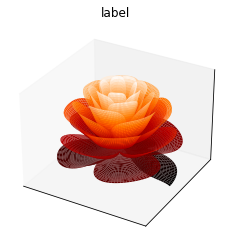

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from matplotlib.font_manager import FontProperties
##font = FontProperties(fname=r"/xx/xxx/xxx/simsun/simsun.ttc", size=14)

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

[x , t] = np.meshgrid(np.array(range(25))/24.0,np.arange(0, 575.5,0.5)/575*17*np.pi - 2*np.pi)
p = np.pi/2 * np.exp(-t/(8*np.pi))
u = 1 - (1 - np.mod(3.6*t, 2 * np.pi)/np.pi) **4/2
y = 2 * (x ** 2-x)**2*np.sin(p)
r = u * (x*np.sin(p) + y * np.cos(p))

surf = ax.plot_surface(r * np.cos(t),r * np.sin(t), u *(x*np.cos(p)-y*np.sin(p)),\
           rstride = 1,cstride=1,cmap = cm.gist_heat,linewidth=0,antialiased=True)

plt.title("label")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()